https://iopscience.iop.org/article/10.1088/1555-6611/aaf63d 
H Ahmad et al 2019 Laser Phys. 29 025301

Generate refractive index and effective mode area

In [2]:
from femwell.mesh import mesh_from_OrderedDict
from skfem.io import from_meshio
from femwell.visualization import plot_domains
from typing import OrderedDict
import shapely
import pandas as pd
import laserfun as lf
from SCG_Stimulation.Benchmark.generate_neff_and_aeff import get_neff_and_aeff
from SCG_Stimulation.refractive_index import n_MgF2, n_Si3N4, n_Air
from collections import OrderedDict
import scipy
import numpy as np
import matplotlib.pyplot as plt

# waveguide parameters
width = 6 # um
height = 0.8 # um
thickness = 0.8 # um

n2 = 2.4e-19     # m^2/W n2 is the nonlinear refractive index at the center
Alpha = 0.0      # loss (dB/cm)

wavelength_range = [500,5000]
wavelegnth_step = 50 # 50nm steps

n_core = n_Si3N4
n_lower_cladding = n_MgF2
n_air = n_Air

# Construct waveguide geometry
core = shapely.geometry.box(-width/2, 0, +width/2, height)
lower_cladding = shapely.geometry.box(-6, -3, 6, 0)
air_cladding = shapely.geometry.box(-6,0,6,6)
air = shapely.geometry.box(-10,-3,10,10)
polygons = OrderedDict(
    core = core,
    lower_cladding = lower_cladding,
    air_cladding = air_cladding,
    air = air
)

# Define material property and resolution of waveguide
resolutions = dict(core={"resolution": 0.04, "distance": 0.2},
                   air_cladding={"resolution": 0.15, "distance": 0.5},  #100nm, let it fall over 300nm
                   lower_cladding={"resolution": 0.15, "distance": 0.5},
                   air = {"resolution": 0.5, "distance": 1}  )

n_dict = {"core": n_core,"lower_cladding":n_lower_cladding ,"air_cladding": n_air, "air":n_air}

print("start")
# Calculate dispersion and gamma
aeff_list, neff_list, wls = get_neff_and_aeff(polygons,n_dict,wavelength_range,wavelegnth_step,resolutions)

##plot data
np.savez(f"data_h_{height}_w_{width}", wls=wls, aeff_list=aeff_list, neff_list=neff_list)



print("end")
print(aeff_list)
print(wls)


C:\Users\eliza\PycharmProjects\SC-generation-stimulation\laserfun\pulse.py:87: RuntimeWarning: overflow encountered in cosh
  self.at = np.sqrt(power)/np.cosh(self.t_ps/(T0_ps))


|⚠︎                                       | (!) 0/160 [0%] in 0.0s (0.00/s) 


TypeError: 'int' object is not callable

Plot the effective mode area to verify

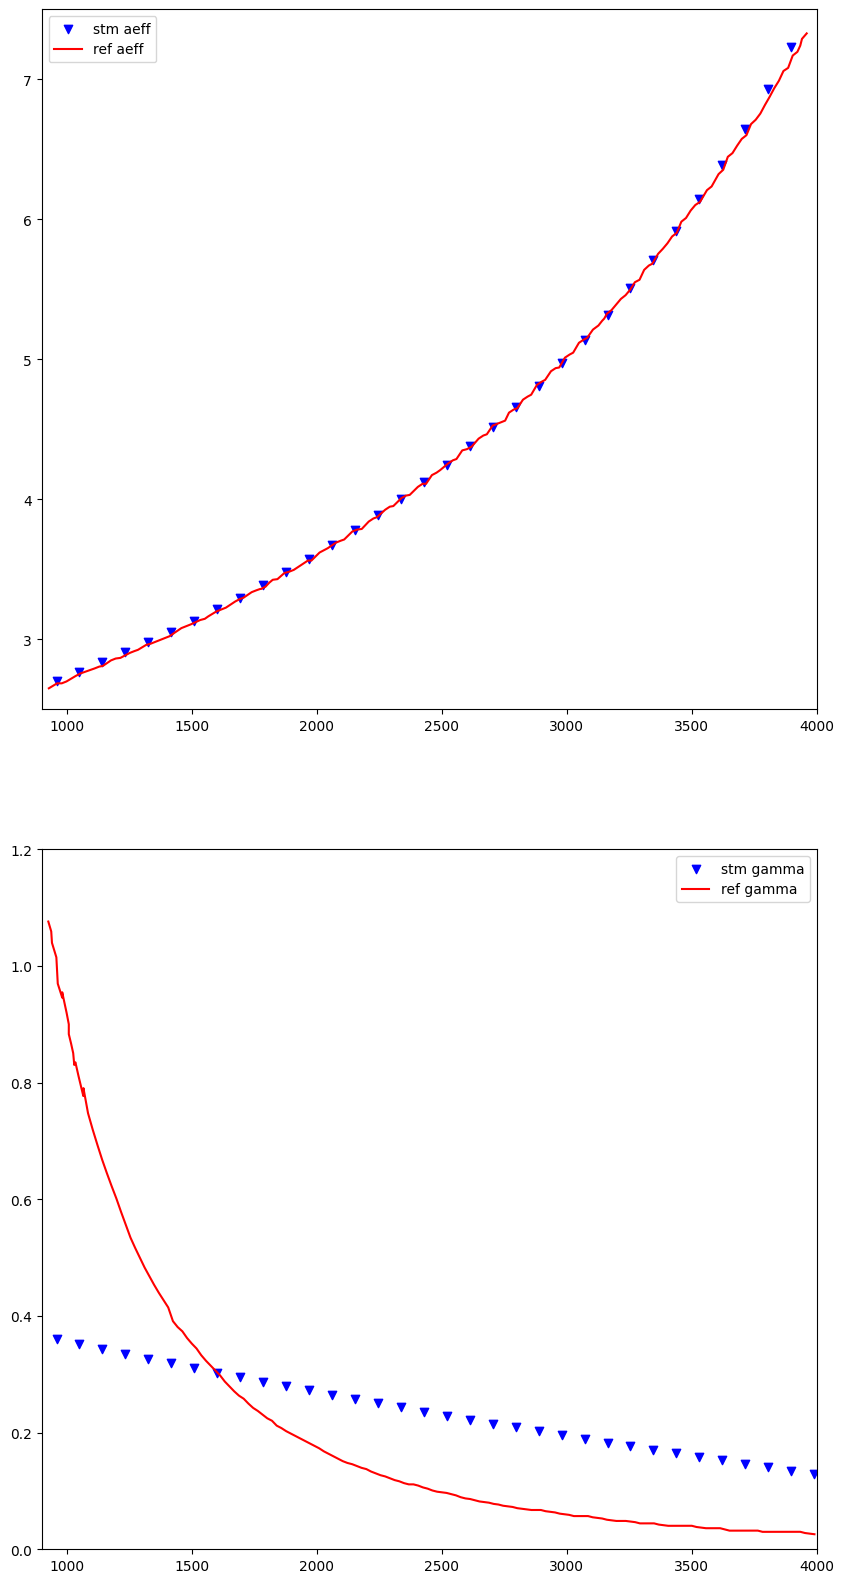

In [19]:
data = np.load("data_h_0.8_w_6.npz")
wls = data['wls']
c_mks = 299792458.0
n2 = 2.4e-19  
pulseWL = 1550
w0 = 2*np.pi*c_mks/(pulseWL*1e-9)
aeff_list = data['aeff_list']
aeff_interp = scipy.interpolate.interp1d(wls, aeff_list)
gamma_list = n2*w0/(aeff_list*1e-12*c_mks)


x, y = list(np.split(pd.read_csv(
    "C:/Users/eliza/PycharmProjects/SC-generation-stimulation/SCG_Stimulation/Benchmark/aeff.csv", dtype=np.float64
    ).values,2, axis=1))

g_x, g_y = list(np.split(pd.read_csv(
    "C:/Users/eliza/PycharmProjects/SC-generation-stimulation/SCG_Stimulation/Benchmark/gamma.csv", dtype=np.float64
    ).values,2, axis=1))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,20))
ax1.scatter(wls,aeff_list,marker="v", c="b", label="stm aeff")
ax1.plot(x, y, c="r", label="ref aeff")
ax1.legend()

ax1.set_xlim(900,4000)
ax1.set_ylim(2.5,7.5)

ax2.scatter(wls,gamma_list,marker="v", c="b", label="stm gamma")
ax2.plot(g_x, g_y, c="r", label="ref gamma")
ax2.legend()

ax2.set_xlim(900,4000)
ax2.set_ylim(0,1.2)
plt.show()